# Stock Portfolio Notebook

## Set Up and Execute Alapaca SDK Request

### Importing the Required Libraries

In [1]:
# Import Required Libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np

%matplotlib inline


### Loading the .env file

In [2]:
# Make sure dotenv is loaded
load_dotenv()

True

### Alpaca API and Secret Key Variables

In [3]:
# Create Alpaca key variables to call from .env() file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

### Create the ALpaca REST Object

In [4]:
# Create our Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

alpaca

### Set the Start and End Dates

In [5]:
# Set the start and end dates for the information we want to pull from Alpaca
start_date = pd.Timestamp("2020-01-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-02", tz="America/New_York").isoformat()

### Set the Tickers for Alpaca to Fetch

In [6]:
# Set the list of tickers we want the Alpaca request to fetch
tickers = ["FB", "AMZN", "PG", "XOM", "JPM", "JNJ", "HON", "LIN", "AMT", "AAPL", "NEE"]

### Set the Timeframe for the Alpaca Request

In [7]:
# Set the timeframe of collection. We just need the a daily price point
timeframe = "1D"

### Create the Request for Alpaca Using get_barset()

In [8]:
# Create the request of the data to fetch via the Alpaca SDK
stock_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  limit=1000,
  start=start_date,
  end=end_date
).df

stock_prices_df

AAPL                                         \
                             open      high       low   close     volume   
time                                                                       
2020-01-02 00:00:00-05:00  296.24  300.6000  295.1900  300.58   30589026   
2020-01-03 00:00:00-05:00  297.15  300.5800  296.5000  297.38   31609363   
2020-01-06 00:00:00-05:00  293.79  299.9600  292.7500  299.78   27487207   
2020-01-07 00:00:00-05:00  299.84  300.9000  297.4800  298.27   23877417   
2020-01-08 00:00:00-05:00  297.16  304.4399  297.1560  303.15   29547763   
...                           ...       ...       ...     ...        ...   
2020-12-24 00:00:00-05:00  131.32  133.4600  131.1000  131.99   51675667   
2020-12-28 00:00:00-05:00  133.99  137.3400  133.5100  136.73  116008068   
2020-12-29 00:00:00-05:00  138.05  138.7890  134.3409  134.93  114407189   
2020-12-30 00:00:00-05:00  135.58  135.9900  133.4000  133.72   87788124   
2020-12-31 00:00:00-05:00  134.08  134.7400  131.7200  132.58   86901528   

                              AMT                                       ...  \
                             open      high       low   close   volume  ...   
time                                                                    ...   
2020-01-02 00:00:00-05:00  229.68  231.1499  228.0051  228.50  1205047  ...   
2020-01-03 00:00:00-05:00  227.56  229.8300  227.0000  228.63  1293710  ...   
2020-01-06 00:00:00-05:00  228.48  230.0000  227.8922  228.51  1077776  ...   
2020-01-07 00:00:00-05:00  227.13  227.5700  221.6200  223.68  1136756  ...   
2020-01-08 00:00:00-05:00  223.48  226.4850  222.5200  225.56   971756  ...   
...                           ...       ...       ...     ...      ...  ...   
2020-12-24 00:00:00-05:00  216.44  219.3900  216.1900  218.64   581627  ...   
2020-12-28 00:00:00-05:00  218.87  221.4500  217.4300  221.04  1078952  ...   
2020-12-29 00:00:00-05:00  222.21  223.4200  220.4200  220.48  1028791  ...   
2020-12-30 00:00:00-05:00  220.51  221.5300  219.3500  220.52  1144758  ...   
2020-12-31 00:00:00-05:00  219.76  224.6650  219.6000  224.30  1297773  ...   

                               PG                                         XOM  \
                             open      high       low   close   volume   open   
time                                                                            
2020-01-02 00:00:00-05:00  124.50  124.7300  122.9400  123.41  5965498  70.24   
2020-01-03 00:00:00-05:00  122.16  123.5300  121.8600  122.53  5620548  71.34   
2020-01-06 00:00:00-05:00  122.57  123.1900  122.3787  122.75  4535596  70.32   
2020-01-07 00:00:00-05:00  122.88  123.2059  121.8700  122.01  4786221  70.50   
2020-01-08 00:00:00-05:00  122.19  123.4299  122.0003  122.52  3652809  70.11   
...                           ...       ...       ...     ...      ...    ...   
2020-12-24 00:00:00-05:00  136.20  138.1300  136.2000  137.81  2076306  41.65   
2020-12-28 00:00:00-05:00  138.15  139.3935  137.9450  138.72  2916003  41.69   
2020-12-29 00:00:00-05:00  139.22  139.9400  138.2000  138.45  3713102  42.04   
2020-12-30 00:00:00-05:00  138.60  138.9214  137.5500  137.80  2260510  41.33   
2020-12-31 00:00:00-05:00  138.31  139.2900  137.3900  139.00  2561486  41.47   

                                                              
                             high      low   close    volume  
time                                                          
2020-01-02 00:00:00-05:00  71.020  70.2368  70.900  10586614  
2020-01-03 00:00:00-05:00  71.370  70.1600  70.320  14148606  
2020-01-06 00:00:00-05:00  71.355  70.2300  70.870  16859539  
2020-01-07 00:00:00-05:00  70.520  69.5100  70.280  11583116  
2020-01-08 00:00:00-05:00  70.285  69.1700  69.235  12425686  
...                           ...      ...     ...       ...  
2020-12-24 00:00:00-05:00  41.850  41.3800  41.617   7579279  
2020-12-28 00:00:00-05:00  42.550  41.5200  41.730  22892003  
2020-12-29 00:00:00-05:00  42

## Calculate Closing Prices and Daily Prices/Plots

In [9]:
# Create a new empty DF that that holds only the closing prices of each stock
stock_closing_prices_df = pd.DataFrame()

### For Loop to Access Closing Prices Only

In [10]:
# Using a for loop, for every ticker in the tickers list, select only the close price for each ticker in the prices_df DF
for ticker in tickers:
  stock_closing_prices_df[ticker] = stock_prices_df[ticker]["close"]

stock_closing_prices_df

,FB,AMZN,PG,XOM,JPM,JNJ,HON,LIN,AMT,AAPL,NEE
time,,,,,,,,,,,
2020-01-02 00:00:00-05:00,209.7800,1897.71,123.41,70.900,141.09,146.00,180.76,210.75,228.50,300.58,238.61
2020-01-03 00:00:00-05:00,208.5100,1874.93,122.53,70.320,138.28,144.22,178.86,205.26,228.63,297.38,240.21
2020-01-06 00:00:00-05:00,212.5855,1903.33,122.75,70.870,138.21,144.11,177.50,204.37,228.51,299.78,241.51
2020-01-07 00:00:00-05:00,213.0500,1906.86,122.01,70.280,135.87,144.99,177.62,204.83,223.68,298.27,241.33
2020-01-08 00:00:00-05:00,215.3000,1892.09,122.52,69.235,136.97,144.92,177.75,207.36,225.56,303.15,241.17
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,267.3200,3171.16,137.81,41.617,124.56,152.53,209.54,256.93,218.64,131.99,74.96
2020-12-28 00:00:00-05:00,277.0000,3283.96,138.72,41.730,125.37,153.24,209.88,260.01,221.04,136.73,75.50
2020-12-29 00:00:00-05:00,276.7800,3320.71,138.45,41.270,125.02,154.24,209.13,259.34,220.48,134.93,75.36


### Calculate the Daily Returns Per Stock in our Stock Portfolio

In [11]:
# Calculate the daily returns for every stock in the Stock Portfolio
per_stock_daily_returns = stock_closing_prices_df.pct_change().dropna()
per_stock_daily_returns

,FB,AMZN,PG,XOM,JPM,JNJ,HON,LIN,AMT,AAPL,NEE
time,,,,,,,,,,,
2020-01-03 00:00:00-05:00,-0.006054,-0.012004,-0.007131,-0.008181,-0.019916,-0.012192,-0.010511,-0.026050,0.000569,-0.010646,0.006706
2020-01-06 00:00:00-05:00,0.019546,0.015147,0.001795,0.007821,-0.000506,-0.000763,-0.007604,-0.004336,-0.000525,0.008070,0.005412
2020-01-07 00:00:00-05:00,0.002185,0.001855,-0.006029,-0.008325,-0.016931,0.006106,0.000676,0.002251,-0.021137,-0.005037,-0.000745
2020-01-08 00:00:00-05:00,0.010561,-0.007746,0.004180,-0.014869,0.008096,-0.000483,0.000732,0.012352,0.008405,0.016361,-0.000663
2020-01-09 00:00:00-05:00,0.013980,0.004709,0.010855,0.007727,0.003431,0.003243,0.007370,0.007378,0.003946,0.021639,0.007712
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,-0.002723,-0.004886,0.010708,-0.003663,-0.004236,0.003883,-0.001668,0.007213,0.004918,0.007865,0.008476
2020-12-28 00:00:00-05:00,0.036211,0.035571,0.006603,0.002715,0.006503,0.004655,0.001623,0.011988,0.010977,0.035912,0.007204
2020-12-29 00:00:00-05:00,-0.000794,0.011191,-0.001946,-0.011023,-0.002792,0.006526,-0.003573,-0.002577,-0.002533,-0.013165,-0.001854


### Calculate Aggregate Daily Returns for Portfolio

In [12]:
# Calculate the daily returns for of the Stock Portfolio
stock_daily_returns_df = stock_closing_prices_df.sum(axis=1).pct_change().dropna()
stock_daily_returns_df

time
2020-01-03 00:00:00-05:00   -0.010395
2020-01-06 00:00:00-05:00    0.009273
2020-01-07 00:00:00-05:00   -0.001265
2020-01-08 00:00:00-05:00   -0.000740
2020-01-09 00:00:00-05:00    0.007193
                               ...   
2020-12-24 00:00:00-05:00   -0.002233
2020-12-28 00:00:00-05:00    0.028436
2020-12-29 00:00:00-05:00    0.006608
2020-12-30 00:00:00-05:00   -0.006866
2020-12-31 00:00:00-05:00   -0.003595
Length: 252, dtype: float64

### Plot the Aggregated Daily Returns

<AxesSubplot:title={'center':'Daily Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)'}, xlabel='time'>

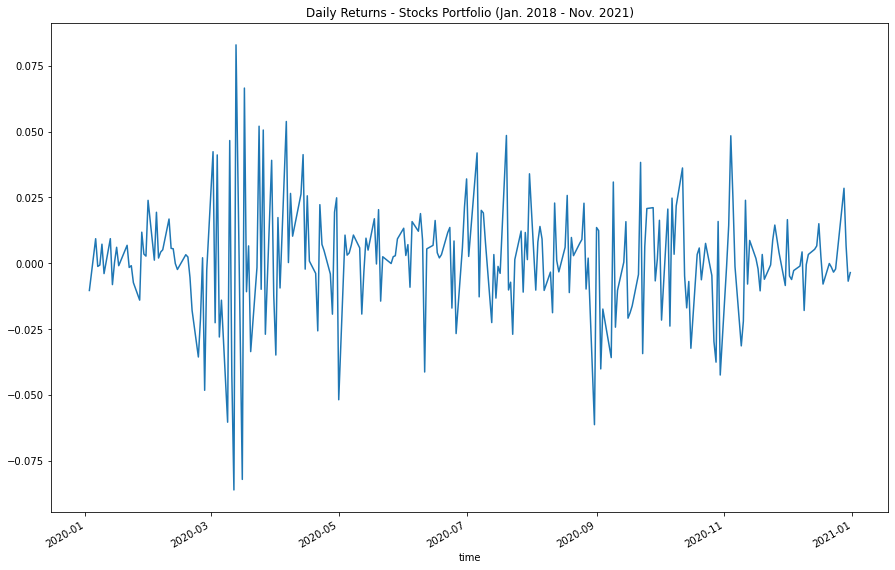

In [13]:
# Plot daily returns for the stocks portfolio
stock_daily_returns_df.plot(figsize=(15,10), title="Daily Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)")

## Calculate the Cumulative Returns of the Portfolio

In [14]:
stock_cumulative_returns_df = (1 + stock_daily_returns_df).cumprod() - 1
stock_cumulative_returns_df

time
2020-01-03 00:00:00-05:00   -0.010395
2020-01-06 00:00:00-05:00   -0.001218
2020-01-07 00:00:00-05:00   -0.002481
2020-01-08 00:00:00-05:00   -0.003219
2020-01-09 00:00:00-05:00    0.003951
                               ...   
2020-12-24 00:00:00-05:00    0.277199
2020-12-28 00:00:00-05:00    0.313517
2020-12-29 00:00:00-05:00    0.322196
2020-12-30 00:00:00-05:00    0.313118
2020-12-31 00:00:00-05:00    0.308397
Length: 252, dtype: float64

### Plot Cumulative Returns for Portfolio

<AxesSubplot:title={'center':'Cumulative Returns - Stocks Portfolio (Jan. 2018 - Jan. 2021)'}, xlabel='time'>

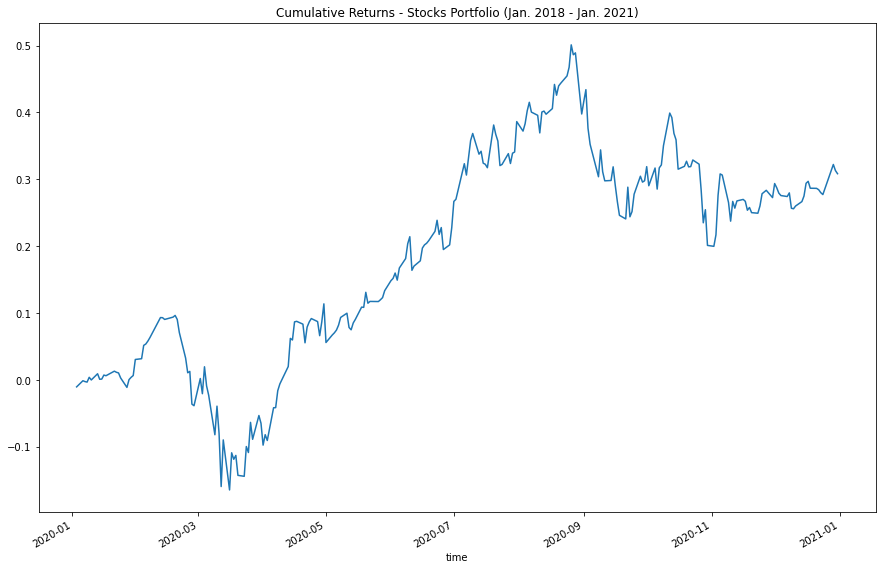

In [15]:
# Plot Cumulative Returns for Stock Portfolio
stock_cumulative_returns_df.plot(figsize=(15,10), title="Cumulative Returns - Stocks Portfolio (Jan. 2018 - Jan. 2021)")

## Set Up and Run Monte Carlo Simulation for 10 Years

In [ ]:
# Set up Monte Carlo Simulation for a 10 year time period with a $10,000 initial investment
MC_stock_ten_year = MCSimulation(
  portfolio_data=stock_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_stock_ten_year.portfolio_data.head()

### Run the MC Simulation for 10 Years

In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_ten_year.calc_cumulative_return()

### Plot the MC 10 Year Simulation Visualization

In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_stock_ten_year.plot_simulation()

### Plot the MC 10 Year Simulation Distribution Visualization

In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_stock_ten_year.plot_distribution()

### Generate MC 10 Year Simulation Summary Statistics

In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_stock_ten_year_summary_statistics = MC_stock_ten_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_stock_ten_year_summary_statistics)

### Calculate the Confidence Intervals to the 95% for the 10 year Simulation on a $10,000 initial investment

In [ ]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
stock_ten_year_lower_ci = round(MC_stock_ten_year_summary_statistics[8]*10000, 2)
stock_ten_year_upper_ci = round(MC_stock_ten_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${stock_ten_year_lower_ci} and ${stock_ten_year_upper_ci}")

## Set Up and Run Monte Carlo Simulation for 30 Years

In [ ]:
# Set up Monte Carlo Simulation for a 30 year time period with a $10,000 initial investment
MC_stock_thirty_year = MCSimulation(
  portfolio_data=stock_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 30
)

MC_stock_thirty_year.portfolio_data.head()

### Run the MC Simulation for 30 Years

In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_thirty_year.calc_cumulative_return()

### Plot the MC 30 Year Simulation Visualization

In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_stock_thirty_year.plot_simulation()

### Plot the MC 30 Year Simulation Distribution Visualization

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_stock_thirty_year.plot_distribution()

### Generate MC 30 Year Simulation Summary Statistics

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_stock_thirty_year_summary_statistics = MC_stock_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_stock_thirty_year_summary_statistics)

### Calculate the Confidence Intervals to the 95% for the 30 year Simulation on a $10,000 initial investment

In [ ]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
stock_thirty_year_lower_ci = round(MC_stock_thirty_year_summary_statistics[8]*10000, 2)
stock_thirty_year_upper_ci = round(MC_stock_thirty_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${stock_thirty_year_lower_ci} and ${stock_thirty_year_upper_ci}")

## Calculate the Standard Deviation & Annualized Standard Deviation for Our Stock Portfolio

In [ ]:
# Calculate Standard Deviation for our Stock Portfolio
stock_standard_deviation = per_stock_daily_returns.std()
stock_standard_deviation = stock_standard_deviation.sort_values()
stock_standard_deviation

### Calculate Annualized Standard Deviation

In [ ]:
# Calculate Annualized Standard Deviation for our Stock Portfolio
stock_annualized_standard_deviation = stock_standard_deviation * np.sqrt(252)
stock_annualized_standard_deviation = stock_annualized_standard_deviation.sort_values()
stock_annualized_standard_deviation

## Calculate the Sharpe Ratio for our Stock Portfolio

### Calculate the Annualized Returns

In [ ]:
# Calculate the Annualized Returns for our Stock Portfolio 
stock_annualized_returns = per_stock_daily_returns.mean() * 252
stock_annualized_returns = stock_annualized_returns.sort_values()
stock_annualized_returns

### Calculate the Sharpe Ratio

In [ ]:
# Calculate the Sharpe Ratio for Our Stock Portfolio
stock_portfolio_sharpe_ratio = stock_annualized_returns / stock_annualized_standard_deviation
stock_portfolio_sharpe_ratio = stock_portfolio_sharpe_ratio.sort_values()
stock_portfolio_sharpe_ratio

### Calculate the Overall Sharpe Ratio for our Stock Portfolio

In [ ]:
# Calculate the Average Sharpe Ratio for our Stock Portfolio
stock_portfolio_average_sharpe_ratio = stock_portfolio_sharpe_ratio.mean()
print(f"{stock_portfolio_average_sharpe_ratio: .3f}")